# Assignment 1: Inspecting the Dataset

In this first assignment, we will get to know the dataset that we will be using throughout. You can find the assignment tasks at the bottom of this document.

Our dataset consists of short texts (article abstracts) from the [PubMed](https://www.ncbi.nlm.nih.gov/pubmed/) database of scientific publications in the Life Science domain. As the full dataset consists of millions of documents, we are using just a small subset, namely all publications that contain the word "Recognition" in their title or abstract. You can download that dataset in the form of four files (`emotion_Summaries.pkl.bz2`, etc.) from Canvas. Save these four files in a directory called `data` (do not unpack them, but save them as .bz2 files!), which should be a sub-directory of the one that contains this notebook file.

## Importing some Libraries

In [1]:
from collections import namedtuple, defaultdict, Counter
import pickle, bz2

## Loading the Dataset

In [2]:
Summaries_file = 'recognition_Summaries.pkl.bz2'
Summaries = pickle.load( bz2.BZ2File( Summaries_file, 'rb' ) )

To make it easier to access the data, we convert here paper entries into [named tuples](http://docs.python.org/3/library/collections.html#collections.namedtuple). This will allow us to refer to fields by keyword ( like `var.year`), rather than index (like `var[2]`).

In [3]:
paper = namedtuple( 'paper', ['title', 'authors', 'year', 'doi'] )

for (id, paper_info) in Summaries.items():
    Summaries[id] = paper( *paper_info )

In [4]:
Summaries[39432831]

paper(title='Structure and Energetics of PET-Hydrolyzing Enzyme Complexes: A Systematic Comparison from Molecular Dynamics Simulations.', authors=['Berselli A', 'Menziani MC', 'Muniz-Miranda F'], year=2024, doi='10.1021/acs.jcim.4c01369')

In [5]:
Summaries[39432831].title

'Structure and Energetics of PET-Hydrolyzing Enzyme Complexes: A Systematic Comparison from Molecular Dynamics Simulations.'

## Dataset Statistics

The two lines below will install [matplotlib](http://matplotlib.org/) and [NumPy](http://www.numpy.org/), if they are not installed already (if that doesn't work, you might have to download and install them from [here](http://matplotlib.org/downloads.html) and [here](http://sourceforge.net/projects/numpy/files/NumPy/1.10.1/)). We will need these libraries for drawing diagrams and analyzing the data below.

In [6]:
! pip install --user matplotlib
! pip install --user numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import matplotlib.pyplot as plt

# show plots inline within the notebook
%matplotlib inline
# set plots' resolution
plt.rcParams['savefig.dpi'] = 100

### Papers per Year

First, we will try to find out how many papers in the dataset were published per year. We are using the [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) class for this.

In [8]:
paper_years = [ p.year for p in Summaries.values() ]
print(set(paper_years))
papers_per_year = sorted( Counter(paper_years).items() )

print(len(Summaries))
print('Number of papers in the dataset per year for the past decade:')
print(papers_per_year[-10:])

{1836, 1837, 1840, 1867, 1868, 1871, 1873, 1876, 1880, 1881, 1882, 1884, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025}
481216
Number of papers in the dataset per year for the past decade:
[(2016, 17385), (2017, 17907), (2018

In [9]:
authors_perYears = [ p.authors for p in Summaries.values() ]
authors_perYears

[['van Dam-Mieras MC', 'Slotboom AJ', 'Pieterson WA', 'de Haas GH'],
 ['Freedman P', 'Smith EC'],
 ['Roversi GD', 'Canussio V', 'Spennacchio M'],
 ['Guggenbichler JP', 'Stickler GB'],
 ['Johnson G'],
 ['Dalziel K'],
 ['Crumpton MJ', 'Allan D', 'Auger J', 'Green NM', 'Maino VC'],
 ['Gerisch G', 'Hülser D', 'Malchow D', 'Wick U'],
 ['Truter MR'],
 ['Godeau P', 'Wechsher B', 'Bletry O', 'Louvel A', 'Fanjoux J'],
 ['Di Natale P', 'Schechter AN', 'Castronuovo Lepore G', 'De Lorenzo F'],
 ['Uphoff DE'],
 ['Orcutt TJ', 'Pruitt BA'],
 ['Wilkins RA', 'De Lacey GJ', 'Flor R', 'Taylor S'],
 ['Barker EG Jr', 'Rosenbaum HD', 'Selke AC Jr', 'Henderson D', 'Hildner JH'],
 ['Komaroff AL',
  'Flatley M',
  'Browne C',
  'Sherman H',
  'Fineberg SE',
  'Knopp RH'],
 ['van Wyk CW'],
 ['Krauss G', 'Peters F', 'Maass G'],
 ['Taub HA', 'Eisenberg L'],
 ['Scheider W', 'Dintzis HM', 'Oncley JL'],
 ['Lefkowitz RJ'],
 ['Scherer WF', 'Anderson K', 'Pancake BA', 'Dickerman RW', 'Ordonez JV'],
 ['Ogata ES', 'Grego

Filtering results, to obain only papers since 1940:

In [10]:
papers_per_year_since_1940 = [ (y,count) for (y,count) in papers_per_year if y >= 1940 ]
years_since_1940 = [ y for (y,count) in papers_per_year_since_1940 ]
nr_papers_since_1940 = [ count for (y,count) in papers_per_year_since_1940 ]

print('Number of papers in the dataset published since 1940:')
print(sum(nr_papers_since_1940))

Number of papers in the dataset published since 1940:
481024


Creating a bar plot to visualize the results (using [matplotlib.pyplot.bar](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar)):

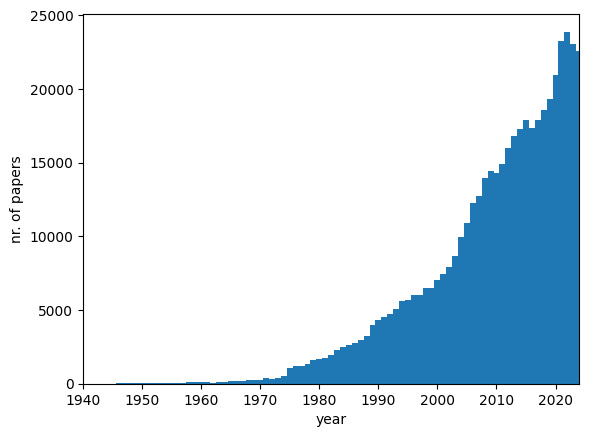

In [11]:
plt.bar(x=years_since_1940, height=nr_papers_since_1940, width=1.0)
plt.xlim(1940, 2024)
plt.xlabel('year')
plt.ylabel('nr. of papers');

Alternatively, we can get the same result by plotting it as a histogram with [matplotlib.pyplot.hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist):

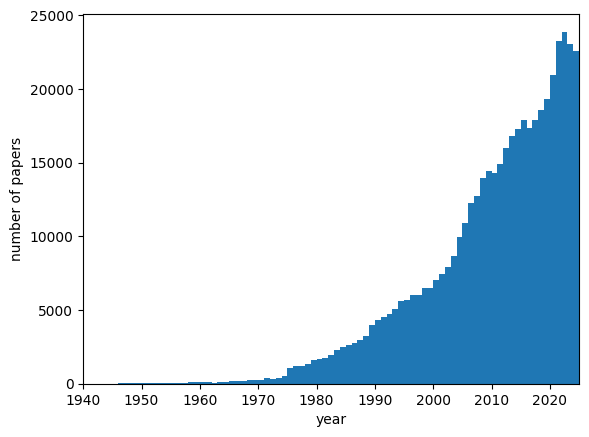

In [12]:
plt.hist( x=[p.year for p in Summaries.values()], bins=range(1940,2026) );
plt.xlim(1940, 2025)
plt.xlabel('year')
plt.ylabel('number of papers');

### Papers per Author

Here, we will obtain the distribution characterizing the number of papers published by an author.

In [13]:
# flattening the list of lists of authors:
flat_author_list = [ auth for paper in Summaries.values() for auth in paper.authors ]

nr_papers_by_author = Counter( flat_author_list )

In [14]:
print('Number of authors in the dataset with distinct names:')
print(len(nr_papers_by_author))

Number of authors in the dataset with distinct names:
868723


In [15]:
print('Top 50 authors with greatest number of papers:')
print(sorted(nr_papers_by_author.items(), key=lambda i:i[1], reverse=True)[:50])

Top 50 authors with greatest number of papers:
[('Wang Y', 4390), ('Zhang Y', 4035), ('Li Y', 3572), ('Liu Y', 3188), ('Wang X', 2962), ('Wang J', 2951), ('Li J', 2795), ('Zhang X', 2655), ('Li X', 2512), ('Zhang J', 2485), ('Wang L', 2332), ('Zhang L', 2146), ('Wang H', 2106), ('Liu J', 1960), ('Liu X', 1949), ('Chen Y', 1947), ('Wang Z', 1926), ('Li H', 1887), ('Zhang H', 1821), ('Chen X', 1722), ('Zhang Z', 1689), ('Wang S', 1636), ('Li Z', 1604), ('Chen J', 1598), ('Yang Y', 1544), ('Li L', 1466), ('Yang J', 1440), ('Liu H', 1418), ('Li S', 1395), ('Zhao Y', 1322), ('Liu Z', 1321), ('Wang C', 1275), ('Li C', 1225), ('Chen L', 1217), ('Zhang W', 1216), ('Wang W', 1206), ('Zhang S', 1191), ('Zhou Y', 1158), ('Wang Q', 1141), ('Wu Y', 1133), ('Xu Y', 1115), ('Liu S', 1113), ('Li W', 1111), ('Li M', 1102), ('Liu L', 1093), ('Chen H', 1082), ('Zhang C', 1080), ('Huang Y', 1060), ('Chen Z', 1051), ('Yang X', 1027)]


Then we can create a histogram to visualize the results:

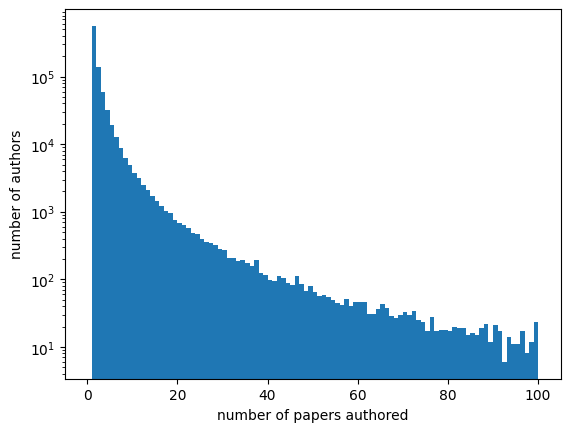

In [16]:
plt.hist( x=list(nr_papers_by_author.values()), bins=range(101), log=True )
plt.xlabel('number of papers authored')
plt.ylabel('number of authors');

### Authors per Paper

Then we can make a similar analysis for the number of authors per paper:

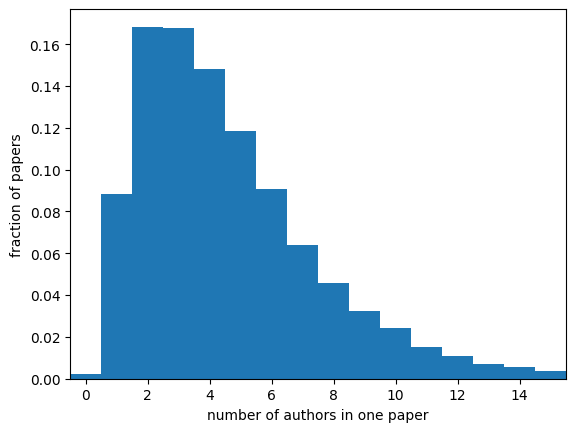

In [17]:
plt.hist(x=[ len(p.authors) for p in Summaries.values() ], bins=range(20), align='left', density=True)
plt.xlabel('number of authors in one paper')
plt.ylabel('fraction of papers')
plt.xlim(-0.5, 15.5);

### Words in Titles

And then we can have a first look into the words we find in titles (applying a very naive word splitting method for now):

In [18]:
words = [ word.lower() for paper in Summaries.values() for word in paper.title.split(' ') ]
word_counts = Counter(words)

print('Number of distinct words in the paper titles:')
print(len(word_counts))

Number of distinct words in the paper titles:
320755


----------

# Tasks

**Your name:** Jaspreet Singh

### Task 1

Create a Python dictionary object that returns a set of all names of second authors (that is, the authors that appear second in the list of authors) for a given year. Name this dictionary `second_authors_at_year`. (You can use a [*defaultdict*](https://docs.python.org/3/library/collections.html#collections.defaultdict) with a default value of [*set*](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset).) Demonstrate the working of this dictionary by showing the set of second authors for the year 1956.

In [19]:

unique_years = set(paper_years)
second_authors_at_year = {}
for year in unique_years:
    second_aut_per_year = []
    for k in Summaries.values():
        if(k.year == year):
            if len(k.authors) >= 2:
                second_aut_per_year.append(k.authors[1])
    second_authors_at_year[year] = set(second_aut_per_year)

         


# your code here

In [20]:
print(second_authors_at_year[1956])
    

{'WEINSTEIN M', 'FRAZIER SH', 'BUSH WR', 'JONES JD', 'HAKE HW', 'BUCKINGHAM RA', 'LABERGE DL', 'FELDMAN H', 'IVANOFF JC', 'JONA E', 'BAILEY DE', 'GLAS WW', 'EWING WH', 'NORDIN BE', 'VONDRASHEK SC', 'STEVENS D', 'ROWE A Jr', 'CONLEY CL', 'PLAZAK DJ', "O'LEARY JL", 'SHANBROM E', 'FRASER R', 'VON MIKULICZ-RADECKI F', "DI SANT'AGNESE PA", 'WYSO E', 'COSTELLO JO', 'VERRIEST G', 'ROSENZWEIG MR', 'BIERMAN HR'}


### Task 2

Based on the dictionary `second_authors_at_year` from exercise 1 above, create a plot for the years from 1956 until now that shows how many authors published at least one paper as second author in the given particular year.

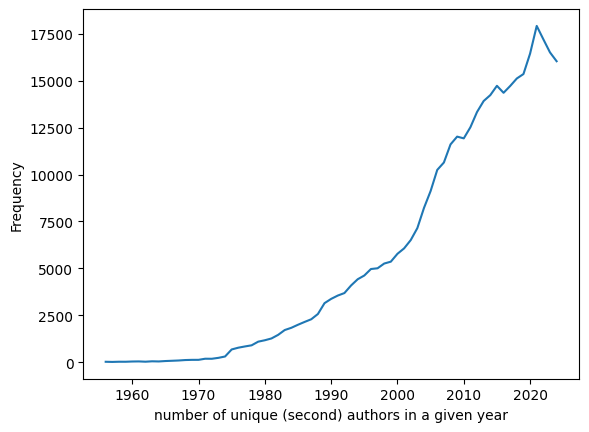

In [21]:
second_authors_at_year_from_1956 = {year: author for year, author in second_authors_at_year.items() if year >= 1956}
count_auth_each_year = []
years = []
for year, authors in second_authors_at_year_from_1956.items():
    count_auth_each_year.append(len(authors))
    years.append(year)
    
plt.plot(years[:len(years)-1],count_auth_each_year[:len(count_auth_each_year)-1]) 
## -2025 as a year
plt.ylabel("Frequency")
plt.xlabel("number of unique (second) authors in a given year")
plt.show()


### Task 3

Print out the top 10 most often occurring words in the papers' titles together with their frequency, in descending order with respect to the frequency. Filter out words that are only one, two, three or four characters long, like `a` or `of` or `the` or `from`, to only show words that have five or more characters. Use the data structures created above (in the sections before the tasks).

In [22]:
# your code here 
filtered_words = [word for word in words if len(word) > 4]

freq_words =Counter(filtered_words)



In [23]:
freq_words.most_common(10)

[('recognition', 63465),
 ('using', 20737),
 ('human', 18931),
 ('protein', 15135),
 ('based', 14106),
 ('analysis', 13413),
 ('detection', 12532),
 ('visual', 12431),
 ('memory', 11524),
 ('effects', 11184)]

### Task 4

Calculate and plot (e.g. using [plt.plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)) a graph of the frequency of the 200 most frequent words in titles of papers, from most frequent to least frequent, again only counting words of five or more characters. (For readability, don't show the actual words.) Make again use of the data structures created above.

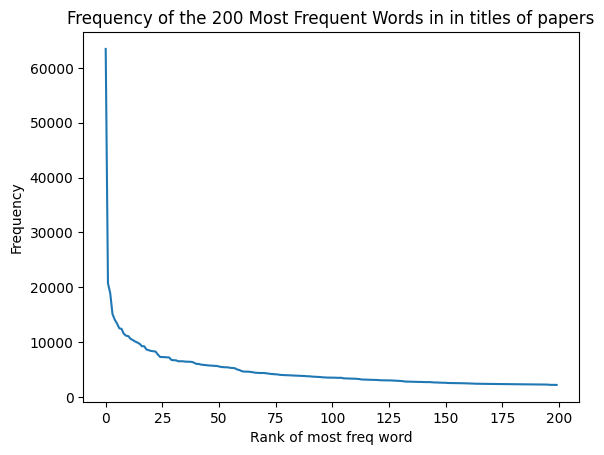

In [24]:

top_200_words = freq_words.most_common(200)
frequencies = [freq for _, freq in top_200_words]
plt.plot(frequencies)
plt.title("Frequency of the 200 Most Frequent Words in in titles of papers")
plt.xlabel("Rank of most freq word")
plt.ylabel("Frequency")
plt.show()

### Task 5

What do you notice when looking at the top 10 most frequent words? Explain all types of words we find in this top-10 and why they show up here.

**Answer:**  We notice that it rapidly decreases after top 1, however this is obvious as we selected a subset of papers in Pubmed that contained "Recognition", so it is obvious that most of the names contains recognition. We also see that that the declining slope is not rapid anymore after the rank 25 , The frequency converges to a somewhat called lower bound. Furthermore on the type. The top 10 most frequent words in the subset of PubMed abstracts focused on "Recognition" and Pubmed contains biomedical research papers. Words like using and based can be seen as methodology, the research methods and approaches commonly used. Words like such as analysis, detection, and effects shows how the research processes are conducted and what outcomes are evaluated.  Words like human, protein, visual, and memory can be seen as the study areas human (biology/health), protein (molecular/ biochemical processes), and visual and memory (cognitive and visual recognition studies).

# Submission

Submit the answers to the assignment via Canvas as a modified version of this Notebook file (file with `.ipynb` extension) that includes your code and your answers.

Before submitting, restart the kernel and re-run the complete code (**Kernel > Restart & Run All**), and then check whether your assignment code still works as expected.

Don't forget to add your name, and remember that the assignments have to be done **individually**, and that code sharing or copying are **strictly forbidden** and will be punished.